In [2]:
# CNN
from tensorflow import keras
import numpy as np
from keras.models import Sequential, model_from_json
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import RMSprop
from keras.datasets import mnist
from keras.utils import np_utils, to_categorical
import matplotlib.pyplot as plt
import os
import pickle

In [34]:
def plot_history (history, save_graph_img_path, fig_size_width, fig_size_height, lim_font_size):
    acc = history.history [ 'accuracy']
    val_acc = history.history [ 'val_accuracy']
    loss = history.history [ 'loss']
    val_loss = history.history [ 'val_loss']
    epochs = range (len (acc))
    plt.figure (figsize = (fig_size_width, fig_size_height))
    plt.rcParams [ 'font.family'] = 'Times New Roman'
    plt.rcParams [ 'font.size'] = lim_font_size 
    # plot accuracy values
    plt.plot (epochs, acc, color = "blue",linestyle = "solid", label = 'train acc')
    plt.plot (epochs, val_acc, color = "green", linestyle = "solid", label = 'valid acc')
    plt.plot (epochs, loss, color = "red", linestyle = "solid", label = 'train loss')
    plt.plot (epochs, val_loss, color = "orange", linestyle = "solid", label = 'valid loss')
    # plt.title ( 'Training and Validation loss')
    plt.legend ()
    plt.grid ()
    plt.savefig (save_graph_img_path)
    plt.close ()

In [35]:
# 데이터 전처리
# 1. 하이퍼 매개변수 (배치크기, 클래스분류(0~9), 학습의 반복회수, drop율 변수)
batch_size = 128
num_classes = 10   # 필기
epochs = 5
dropout_rate = 0.2   # 지나친 학습 방지용(over-fitting) : 입력의 20%를 0으로 준다.

# 2. 입력이미지 매개변수 (폭, 높이, 흑백픽셀)
img_width = 28
img_height = 28
img_ch = 1   # 흑백에서 학습할 수 있도록 지정한다.

# 3. 데이터 저장을 위한 디렉토리
SAVE_DATA_DIR_PATH = 'C:\\Users\\user\\MyPython\\DL\\'

# 4. 차트 이미지의 크기
FIG_SIZE_WIDTH = 12
FIG_SIZE_HEIGHT = 10
FIG_FONT_SIZE = 25

# 5. 디렉토리 없을 경우 새로 만들자
os.makedirs(SAVE_DATA_DIR_PATH, exist_ok=True)

# 6. 입력 데이터수 (28*28=784)
num_input = int(img_width * img_height)

# 7. 데이터 셋을 로드
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 8. 각 이미지 데이터를 28*28*1 리사이즈
x_train = x_train.reshape(x_train.shape[0], img_width, img_height, img_ch)
x_test = x_test.reshape(x_test.shape[0], img_width, img_height, img_ch)

# 9. 데이터 형 변환
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# 10. 정규화 = 0 ~ 255 -> 0.0 ~ 1.0로 변환 
x_train /= 255
x_test /= 255

# 11. 카테고리 변수를 학습할 수 있도록 0과 1로 처리 (one-hot)
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

# 12. 데이터 셋 확인
print(x_train.shape[0])   # 60000
print(x_test.shape[0])   # 10000

60000
10000


In [ ]:
CNN(회선 신경망)
 - 입력층 = 28*28*1
 - 2차원 회선 층
   Conv2D : 2차원 회선 층의 이미지에서 특징 추출(활성화함수로 relu를 가장 많이 씀)
   입력데이터 커널 (3*3으로 32종류의 필터를 각 칸에 적용)
   출력단위 (32장 분량의 출력데이터를 리턴)
    
 - 2차원 회선 층
   Conv2D : 2차원 회선 층의 이미지에서 특징 추출(활성화함수로 relu를 가장 많이 씀)
   입력데이터 커널 (3*3으로 64종류의 필터를 각 칸에 적용)
   출력단위 (64장 분량의 출력데이터를 리턴)

In [ ]:
풀링 층
- 특징 샘플 압축하는 층 (목적 : 견고, 과학습 방지계산, 비용억제)(이미지 크기를 작게 만든다)

- 회선 층에서 추출된 특징 샘플의 위치를 약간 낮춘다. - 이미지의 위치가 약간 변화되더라도 풀링층에서 보편화된다.

- 이미지의 공간 크기를 작게 조정하는 매개변수의 수를 줄이기 때문에 과학습 방지가 된다.


In [ ]:
전체 결합층 : 0~9까지의 10분류가 된 문제 때문에 활성화 함수 softmax 함수
  - softmax : 함수의 총합이 1이 되도록 각 출력의 예측 확률의 계산
    ex) 0.7, 0, 0, 0, 0, 0, 0.2, 0, 0, 0.1 (0확률 70%, 6확률 20%, 9확률 10%)

In [36]:
# 모델 구축
model = Sequential()   # 순차 모델
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(img_width, img_height, img_ch)))
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))

# 풀링층 : 2*2 크기의 최대 풀링층 입력 이미지내 2*2 영역의 최대 수치를 출력한다
model.add(MaxPooling2D (pool_size=(2,2)))

# 과학습 방지
model.add(Dropout(dropout_rate))

# 차원 감소 후 1차원 벡터로 변환
model.add(Flatten())

# 전체 결합층
model.add(Dense(num_classes, activation='softmax'))

# 모델 구조 확인
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                92170     
Total params: 110,986
Trainable params: 110,986
Non-trainable params: 0
________________________________________________

In [37]:
# 컴파일(다 클래스 분류 문제)
model.compile(loss='categorical_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])

# 모델 학습   train 중 10%를 검증데이터로 하겠다
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_split=0.1)

# 성능 측정 : 테스트 데이터 셋에서 학습된 분류 모델기에 입력해서 성능을 측정
score = model.evaluate(x_test, y_test, verbose=0)

# 성능 값 출력
# 정답률은 높으면 좋고, 손실률은 낮으면 좋다
print('test loss :', score[0])
print('test accuracy :', score[1])

# history를 그래프로 저장
plot_history(history, save_graph_img_path = SAVE_DATA_DIR_PATH + 'graph.png', fig_size_width = FIG_SIZE_WIDTH, fig_size_height = FIG_SIZE_HEIGHT, lim_font_size = FIG_FONT_SIZE)

# 모델 구조 저장
open(SAVE_DATA_DIR_PATH+'model02.json', 'w').write(model.to_json())

# 학습에서 사용한 가중치
model.save_weights(SAVE_DATA_DIR_PATH+'weigh.hdf5')

# 학습 이력 저장
with open(SAVE_DATA_DIR_PATH+'history.json', 'wb') as f:
    pickle.dump(history.history, f)

Epoch 1/5
422/422 [==============================] - 37s 86ms/step - loss: 0.4296 - accuracy: 0.8679 - val_loss: 0.0637 - val_accuracy: 0.9837
Epoch 2/5
422/422 [==============================] - 38s 91ms/step - loss: 0.0710 - accuracy: 0.9795 - val_loss: 0.0474 - val_accuracy: 0.9858
Epoch 3/5
422/422 [==============================] - 38s 91ms/step - loss: 0.0490 - accuracy: 0.9853 - val_loss: 0.0465 - val_accuracy: 0.9872
Epoch 4/5
422/422 [==============================] - 36s 86ms/step - loss: 0.0368 - accuracy: 0.9888 - val_loss: 0.0441 - val_accuracy: 0.9892
Epoch 5/5
422/422 [==============================] - 36s 86ms/step - loss: 0.0348 - accuracy: 0.9900 - val_loss: 0.0398 - val_accuracy: 0.9883
test loss : 0.03588439151644707
test accuracy : 0.9879000186920166


Epoch 1/20
469/469 [==============================] - 4s 8ms/step - loss: 0.4454 - accuracy: 0.8593 - val_loss: 0.1271 - val_accuracy: 0.9601
Epoch 2/20
469/469 [==============================] - 4s 8ms/step - loss: 0.1036 - accuracy: 0.9673 - val_loss: 0.0892 - val_accuracy: 0.9737
Epoch 3/20
469/469 [==============================] - 4s 8ms/step - loss: 0.0743 - accuracy: 0.9773 - val_loss: 0.0832 - val_accuracy: 0.9767
Epoch 4/20
469/469 [==============================] - 4s 8ms/step - loss: 0.0585 - accuracy: 0.9828 - val_loss: 0.0786 - val_accuracy: 0.9777
Epoch 5/20
469/469 [==============================] - 4s 8ms/step - loss: 0.0461 - accuracy: 0.9859 - val_loss: 0.0714 - val_accuracy: 0.9825
Epoch 6/20
469/469 [==============================] - 4s 8ms/step - loss: 0.0376 - accuracy: 0.9883 - val_loss: 0.0712 - val_accuracy: 0.9827
Epoch 7/20
469/469 [==============================] - 4s 8ms/step - loss: 0.0352 - accuracy: 0.9898 - val_loss: 0.0741 - val_accuracy: 0.9837
Epoch 

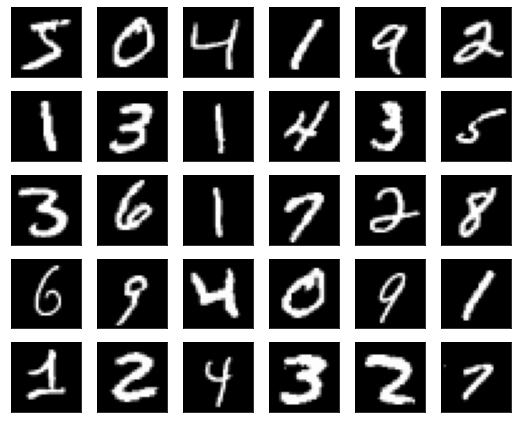

In [54]:
# exam) 같지만 또 다른 코드를 작성해보자
from keras.datasets import mnist
import keras
import pandas as pd
import matplotlib.pyplot as plt


(x_train, y_train), (x_test, y_test) = mnist.load_data()

fig = plt.figure(figsize = (9,9))

for i in range(30):
    res = fig.add_subplot(6, 6, i+1, xticks=[], yticks=[])
    res.imshow(x_train[i], cmap='gist_gray')

# 28*28 784개 정규화 0 ~ 1.0변환
x_train = x_train.reshape(60000,784).astype('float32') / 255
x_test = x_test.reshape(10000,784).astype('float32') / 255

# 인코딩 one-hot
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# 모델 (순차 모델)
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(10, activation='softmax'))

# 컴파일(다 클래스 분류 문제)
model.compile(loss='categorical_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])

# 모델 학습
history = model.fit(x_train, y_train, batch_size=128, epochs=20, verbose=1, validation_data=(x_test, y_test))

[0.9227166771888733, 0.9682999849319458, 0.9771333336830139, 0.9817166924476624, 0.9850999712944031, 0.9866999983787537, 0.9889333248138428, 0.9899666905403137, 0.9911666512489319, 0.9920333623886108, 0.9921833276748657, 0.9934999942779541, 0.9932500123977661, 0.9940166473388672, 0.9939666390419006, 0.9944666624069214, 0.9945499897003174, 0.9947500228881836, 0.9957000017166138, 0.9952666759490967]
[0.960099995136261, 0.9736999869346619, 0.9767000079154968, 0.9776999950408936, 0.9825000166893005, 0.982699990272522, 0.9836999773979187, 0.9818999767303467, 0.9807999730110168, 0.9812999963760376, 0.9801999926567078, 0.9847999811172485, 0.9818000197410583, 0.984000027179718, 0.984000027179718, 0.9835000038146973, 0.9818000197410583, 0.9829999804496765, 0.9836000204086304, 0.9847000241279602]


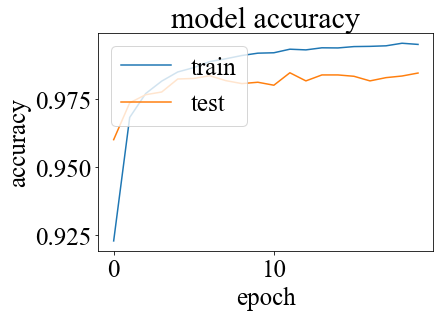

[0.2515948712825775, 0.10224797576665878, 0.0757107213139534, 0.061892468482255936, 0.049731235951185226, 0.04288305342197418, 0.03815540671348572, 0.03488553315401077, 0.030796002596616745, 0.026375100016593933, 0.028672950342297554, 0.022426435723900795, 0.023954926058650017, 0.02096516452729702, 0.021530957892537117, 0.01919783279299736, 0.018918361514806747, 0.017929555848240852, 0.016272487118840218, 0.017899587750434875]
[0.12711301445960999, 0.0891505628824234, 0.08321581780910492, 0.0786004364490509, 0.07137513160705566, 0.07124056667089462, 0.07414988428354263, 0.08769473433494568, 0.09454723447561264, 0.09303613007068634, 0.10235688090324402, 0.08929949253797531, 0.10984582453966141, 0.11347037553787231, 0.10531700402498245, 0.12050823122262955, 0.11617369204759598, 0.12789373099803925, 0.12411076575517654, 0.12050499022006989]


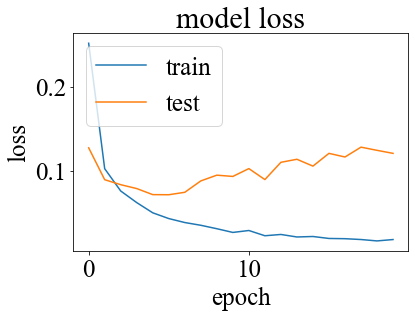

In [55]:
# 결과값
print(history.history['accuracy'])
print(history.history['val_accuracy'])

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# 결과값
print(history.history['loss'])
print(history.history['val_loss'])

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()